In [1]:
import numpy as np
from sklearn import neighbors
from sklearn import metrics
import pandas as pd
import time
from scipy import stats as stats
import yfinance as yf
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns

In [3]:
import skccm.data as data
import skccm.paper as paper
sns.set_style('ticks')
sns.set_context(context='paper',font_scale=1.5)

### 1. Хаотические ряды

### ряд Лоренца

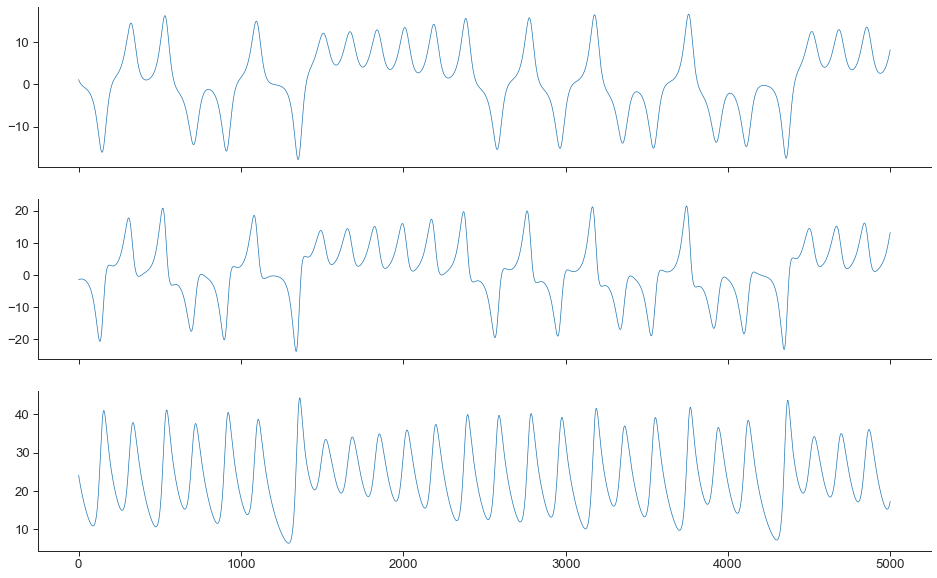

In [245]:
X = np.loadtxt("lorenz.csv.gz", delimiter=",")[:,2000:7000] #data.lorenz()[2000:7000]
noise = 10
#X = X + noise * np.random.rand(X.shape[1])
fig,ax = plt.subplots(3, figsize=(16,10),sharex=True)
ax[0].plot(X[0], lw=0.7)
ax[1].plot(X[1], lw=0.7)
ax[2].plot(X[2], lw=0.7)
sns.despine()

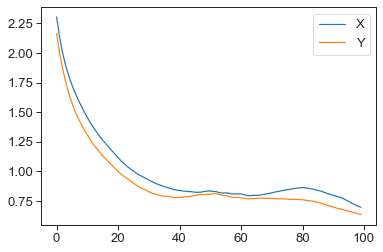

In [246]:
e1 = paper.Embed(X[0])
e2 = paper.Embed(X[1])
mi1 = e1.mutual_information(100)
mi2 = e2.mutual_information(100)
plt.plot(mi1, label='X')
plt.plot(mi2, label='Y')
plt.legend();

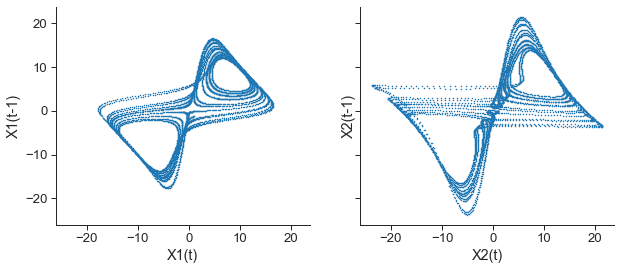

In [247]:
lag = 50
embed = 3
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1], s=0.5)
ax[1].scatter(X2[:,0],X2[:,1], s=0.5)
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

### Cross-mapping convergency (Lorenz)

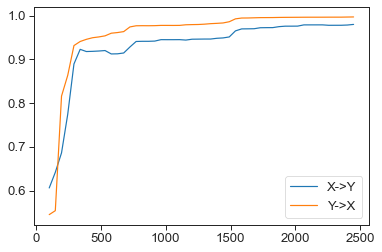

In [248]:
len_X1 = len(X1)
lib_lens = np.linspace(100, len_X1/2, num=50, dtype='int')
CCM = paper.CCM()
CCM.fit(X1,X2)
x1p, x2p = CCM.predict_no_drop(lib_lens)
sc1,sc2 = CCM.score()
plt.plot(lib_lens,sc1, label='X->Y')
plt.plot(lib_lens,sc2, label='Y->X')
plt.legend();

### Pattern Causality (Lorenz)

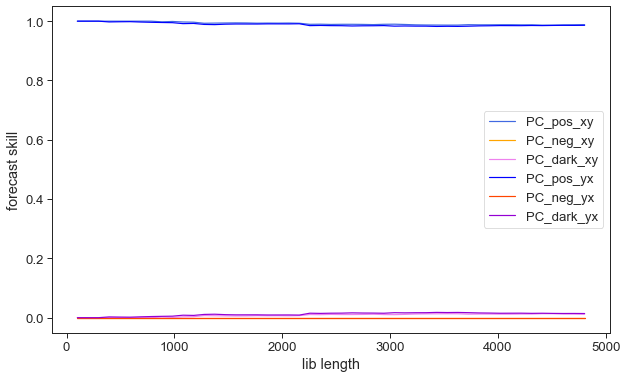

In [249]:
lag = 50
embed = 3
x1=pd.DataFrame(X[0], columns=["x1"])["x1"]
x2=pd.DataFrame(X[1], columns=["x2"])["x2"]
e1 = Embed(x1) #sol1[0][:10000]
e2 = Embed(x2) #sol2[0][:10000]
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

#library lengths to test
len_ts = len(X1)
lib_lens = np.arange(100, len_ts, len_ts/50, dtype='int')
#test causation
PC = PatternCausality()
PC.fit(X1, X2, x1, x2)
X1_pred, X2_pred, X01_pred, X02_pred = PC.predict_benchs(lib_lengths=lib_lens)

sc1, sc2 = PC.PC_score()
PC_pos_xy, PC_neg_xy, PC_dark_xy = sc1[:,0], sc1[:,1], sc1[:,2]
PC_pos_yx, PC_neg_yx, PC_dark_yx = sc2[:,0], sc2[:,1], sc2[:,2]

plt.figure(figsize=(10,6))
plt.plot(lib_lens, PC_pos_xy, color='royalblue', label = 'PC_pos_xy')
plt.plot(lib_lens, PC_neg_xy, color='orange', label = 'PC_neg_xy')
plt.plot(lib_lens, PC_dark_xy, color='violet', label = 'PC_dark_xy')

plt.plot(lib_lens, PC_pos_yx, color='blue', label = 'PC_pos_yx')
plt.plot(lib_lens, PC_neg_yx, color='orangered', label = 'PC_neg_yx')
plt.plot(lib_lens, PC_dark_yx, color='darkviolet', label = 'PC_dark_yx')

plt.ylabel('forecast skill')
plt.xlabel('lib length')
plt.legend();

### ряд Рёсслера

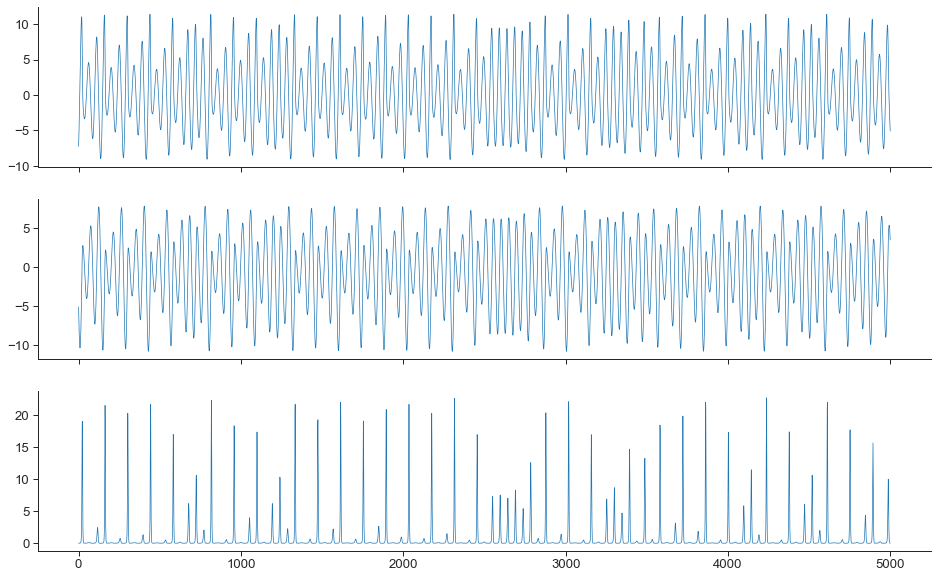

In [250]:
X = np.loadtxt("rossler.csv.gz", delimiter=",")[:,2000:7000] #data.lorenz()[2000:7000]
noise = 10
#X = X + noise * np.random.rand(X.shape[1])
fig,ax = plt.subplots(3, figsize=(16,10),sharex=True)
ax[0].plot(X[0], lw=0.7)
ax[1].plot(X[1], lw=0.7)
ax[2].plot(X[2], lw=0.7)
sns.despine()

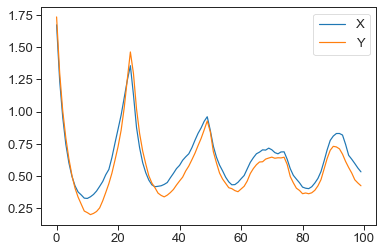

In [251]:
e1 = paper.Embed(X[0])
e2 = paper.Embed(X[1])
mi1 = e1.mutual_information(100)
mi2 = e2.mutual_information(100)
plt.plot(mi1, label='X')
plt.plot(mi2, label='Y')
plt.legend();

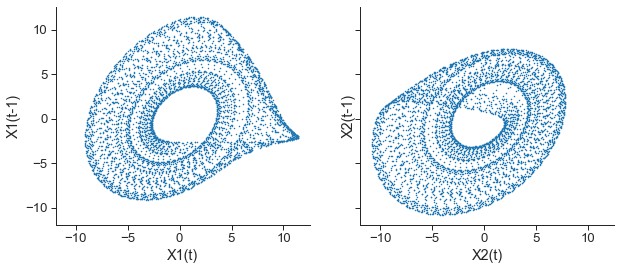

In [252]:
lag = 10
embed = 3
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1], s=0.5)
ax[1].scatter(X2[:,0],X2[:,1], s=0.5)
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

### Cross-mapping convergency (Rossler)

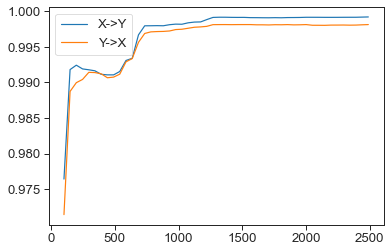

In [253]:
len_X1 = len(X1)
lib_lens = np.linspace(100, len_X1/2, num=50, dtype='int')
CCM = paper.CCM()
CCM.fit(X1,X2)
x1p, x2p = CCM.predict_no_drop(lib_lens)
sc1,sc2 = CCM.score()
plt.plot(lib_lens,sc1, label='X->Y')
plt.plot(lib_lens,sc2, label='Y->X')
plt.legend();

### Pattern Causality (Rossler)

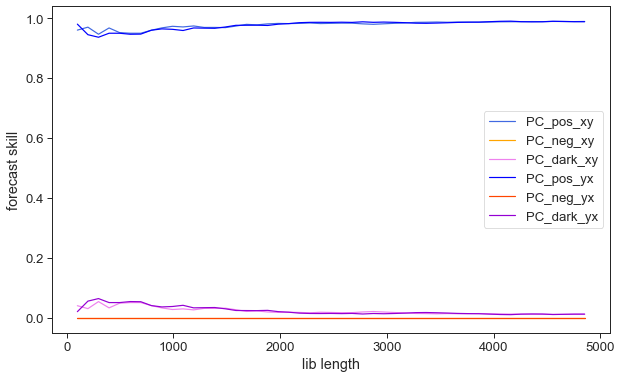

In [254]:
lag = 10
embed = 3
x1=pd.DataFrame(X[0], columns=["x1"])["x1"]
x2=pd.DataFrame(X[1], columns=["x2"])["x2"]
e1 = Embed(x1) #sol1[0][:10000]
e2 = Embed(x2) #sol2[0][:10000]
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

#library lengths to test
len_ts = len(X1)
lib_lens = np.arange(100, len_ts, len_ts/50, dtype='int')
#test causation
PC = PatternCausality()
PC.fit(X1, X2, x1, x2)
X1_pred, X2_pred, X01_pred, X02_pred = PC.predict_benchs(lib_lengths=lib_lens)

sc1, sc2 = PC.PC_score()
PC_pos_xy, PC_neg_xy, PC_dark_xy = sc1[:,0], sc1[:,1], sc1[:,2]
PC_pos_yx, PC_neg_yx, PC_dark_yx = sc2[:,0], sc2[:,1], sc2[:,2]

plt.figure(figsize=(10,6))
plt.plot(lib_lens, PC_pos_xy, color='royalblue', label = 'PC_pos_xy')
plt.plot(lib_lens, PC_neg_xy, color='orange', label = 'PC_neg_xy')
plt.plot(lib_lens, PC_dark_xy, color='violet', label = 'PC_dark_xy')

plt.plot(lib_lens, PC_pos_yx, color='blue', label = 'PC_pos_yx')
plt.plot(lib_lens, PC_neg_yx, color='orangered', label = 'PC_neg_yx')
plt.plot(lib_lens, PC_dark_yx, color='darkviolet', label = 'PC_dark_yx')

plt.ylabel('forecast skill')
plt.xlabel('lib length')
plt.legend();

## Финансовые ряды

### Apple and Microsoft stock prices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


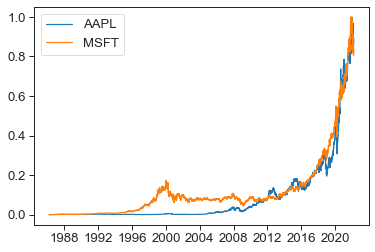

In [333]:
tickers = ['AAPL', 'MSFT']
start = '1986-03-13'
end = '2022-03-13'
raw_data = pd.DataFrame()
for ticker in tickers:
    raw_data[ticker] = yf.download(ticker, start, end)['Close']
raw_data[tickers[0]].fillna(method='ffill', inplace=True)
raw_data[tickers[1]].fillna(method='ffill', inplace=True)
x1 = feature_scale(raw_data[tickers[0]])
x2 = feature_scale(raw_data[tickers[1]])

plt.plot(x1, label = 'AAPL')
plt.plot(x2, label = 'MSFT')
plt.legend();

### CCM (AAPL and MSFT)

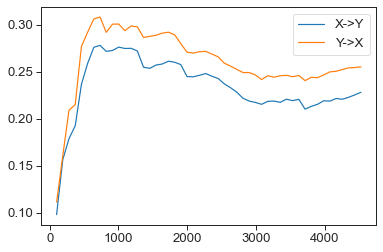

In [334]:
x1_ = np.log(raw_data[tickers[0]] / raw_data[tickers[0]].shift(1)).dropna().values
x2_ = np.log(raw_data[tickers[1]] / raw_data[tickers[1]].shift(1)).dropna().values
e1 = paper.Embed(x1_)
e2 = paper.Embed(x2_)
lag = 10
embed = 3
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)
len_X1 = len(X1)
lib_lens = np.linspace(100, len_X1/2, num=50, dtype='int')
CCM = paper.CCM()
CCM.fit(X1,X2)
x1p, x2p = CCM.predict_no_drop(lib_lens)
sc1,sc2 = CCM.score()
plt.plot(lib_lens,sc1, label='X->Y')
plt.plot(lib_lens,sc2, label='Y->X')
plt.legend();

### Pattern Causality (AAPL and MSFT)

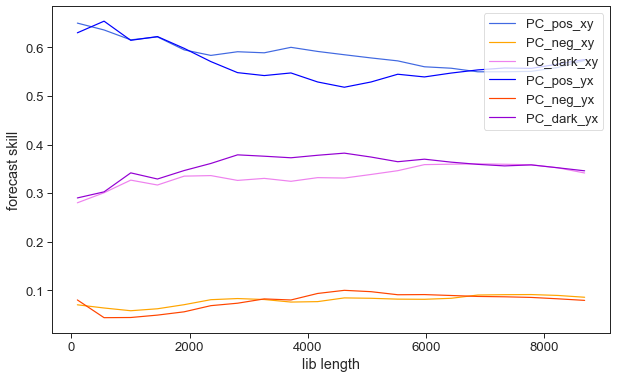

In [283]:
lag = 10
embed = 3
e1 = Embed(x1) #sol1[0][:10000]
e2 = Embed(x2) #sol2[0][:10000]
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

#PC = PatternCausality() #initiate the class

#library lengths to test
len_ts = len(X1)
lib_lens = np.arange(100, len_ts, len_ts/20, dtype='int')
#test causation
PC = PatternCausality()
PC.fit(X1, X2, x1, x2)
X1_pred, X2_pred, X01_pred, X02_pred = PC.predict_stocks(lib_lengths=lib_lens, thr_rate=0.0001, lag=lag)

sc1, sc2 = PC.PC_score()
PC_pos_xy, PC_neg_xy, PC_dark_xy = sc1[:,0], sc1[:,1], sc1[:,2]
PC_pos_yx, PC_neg_yx, PC_dark_yx = sc2[:,0], sc2[:,1], sc2[:,2]

plt.figure(figsize=(10,6))
plt.plot(lib_lens, PC_pos_xy, color='royalblue', label = 'PC_pos_xy')
plt.plot(lib_lens, PC_neg_xy, color='orange', label = 'PC_neg_xy')
plt.plot(lib_lens, PC_dark_xy, color='violet', label = 'PC_dark_xy')

plt.plot(lib_lens, PC_pos_yx, color='blue', label = 'PC_pos_yx')
plt.plot(lib_lens, PC_neg_yx, color='orangered', label = 'PC_neg_yx')
plt.plot(lib_lens, PC_dark_yx, color='darkviolet', label = 'PC_dark_yx')

plt.ylabel('forecast skill')
plt.xlabel('lib length')
plt.legend();

### S&P500 index and 10y US Treasury bond yield

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


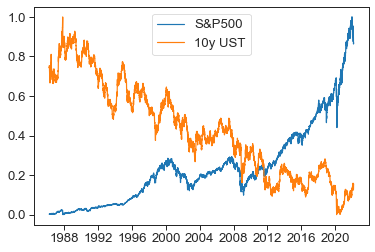

In [360]:
tickers = '^GSPC', '^TNX'
start = '1986-03-13'
end = '2022-03-13'
raw_data = pd.DataFrame()
for ticker in tickers:
    raw_data[ticker] = yf.download(ticker, start, end)['Close']
raw_data[tickers[1]].fillna(method='ffill', inplace=True)

x1 = feature_scale(raw_data[tickers[0]])
x2 = feature_scale(raw_data[tickers[1]])

plt.plot(x1, label = 'S&P500')
plt.plot(x2, label = '10y UST')
plt.legend();

In [350]:
np.savetxt('x1_.txt', x1_)
np.savetxt('x2_.txt', x2_)

### CCM (S&P500 and 10y UST)

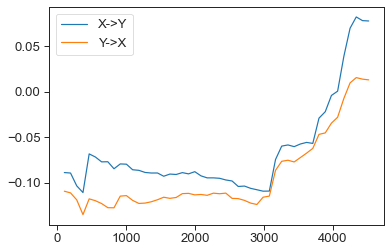

In [361]:
x1_ = np.log(raw_data[tickers[0]] / raw_data[tickers[0]].shift(1)).dropna().values
x2_ = np.log(raw_data[tickers[1]] / raw_data[tickers[1]].shift(1)).dropna().values
e1 = paper.Embed(x1_)
e2 = paper.Embed(x2_)
lag = 10
embed = 3
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)
len_X1 = len(X1)
lib_lens = np.linspace(100, len_X1/2, num=50, dtype='int')
CCM = paper.CCM()
CCM.fit(X1,X2)
x1p, x2p = CCM.predict_no_drop(lib_lens)
sc1,sc2 = CCM.score()
plt.plot(lib_lens,sc1, label='X->Y')
plt.plot(lib_lens,sc2, label='Y->X')
plt.legend();

### Pattern Causality (S&P500 and 10y UST)

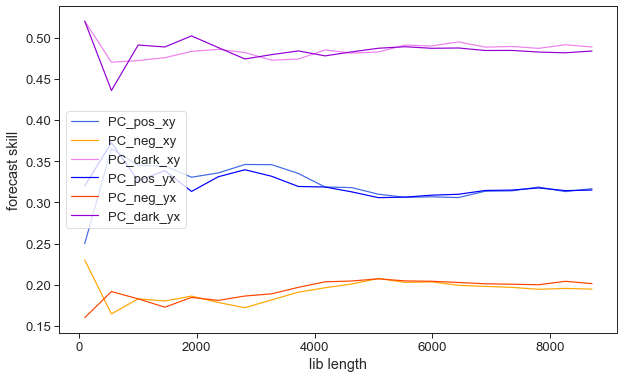

In [363]:
lag = 1
embed = 3
e1 = Embed(x1) #sol1[0][:10000]
e2 = Embed(x2) #sol2[0][:10000]
#X1 = np.load('df1n.npy')
#X2 = np.load('df2n.npy')
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

#library lengths to test
len_ts = len(X1)
lib_lens = np.arange(100, len_ts, len_ts/20, dtype='int')
#test causation
PC = PatternCausality()
PC.fit(X1, X2, x1, x2)
X1_pred, X2_pred, X01_pred, X02_pred = PC.predict_stocks(lib_lengths=lib_lens, thr_rate=0.0001, lag=lag)

sc1, sc2 = PC.PC_score()
PC_pos_xy, PC_neg_xy, PC_dark_xy = sc1[:,0], sc1[:,1], sc1[:,2]
PC_pos_yx, PC_neg_yx, PC_dark_yx = sc2[:,0], sc2[:,1], sc2[:,2]

plt.figure(figsize=(10,6))
plt.plot(lib_lens, PC_pos_xy, color='royalblue', label = 'PC_pos_xy')
plt.plot(lib_lens, PC_neg_xy, color='orange', label = 'PC_neg_xy')
plt.plot(lib_lens, PC_dark_xy, color='violet', label = 'PC_dark_xy')

plt.plot(lib_lens, PC_pos_yx, color='blue', label = 'PC_pos_yx')
plt.plot(lib_lens, PC_neg_yx, color='orangered', label = 'PC_neg_yx')
plt.plot(lib_lens, PC_dark_yx, color='darkviolet', label = 'PC_dark_yx')

plt.ylabel('forecast skill')
plt.xlabel('lib length')
plt.legend();

### Theory code

In [92]:
class PatternCausality:
    """
    Convergent cross mapping for two embedded time series
    """

    def __init__(self, weights='exp', verbose=False):
        """
        Parameters
        ----------
        weights : weighting scheme for predictions
            - exp : exponential weighting
        score : how to score the predictions
            -'score'
            -'corrcoef'
        verbose : prints out calculation status
        """

        self.weights = weights
        self.verbose = verbose    
    
    def fit(self, X1, X2, x1, x2):
        """
        Fit the training data for ccm. Creates seperate near neighbor regressors
        for X1 and X2 independently.
        X1 : embedded time series of shape (num_samps,embed_dim)
        X2 : embedded time series of shape (num_samps,embed_dim)
        near_neighs : string
            - 'sorround' : this is what the paper uses
            - 'all' : calculate the distance to all near neighbors
        """

        # Save X1_train and X2_train for prediction later. Confusing,
        # but we need to make predictions about our testing set using these.
        self.X1 = X1
        self.X2 = X2
        self.x1 = x1
        self.x2 = x2

        #to sorround a point, there must be ndim + 1 points
        # we add two here because the closest neighbor is itself. so that is
        # going to be dropped.
        near_neighs = X1.shape[1] + 2

        self.knn1 = neighbors.KNeighborsRegressor(near_neighs, p = 2) #, weights='distance', algorithm='kd_tree'
        self.knn2 = neighbors.KNeighborsRegressor(near_neighs, p = 2) #, weights='distance', algorithm='kd_tree',

    def predict_stocks(self, lib_lengths, thr_rate, lag):
        """
        Make a prediction
        Parameters
        ----------
        X1_test : test set
        X2_test : test set
        lib_lengths : list of library lengths to test
        """
        
        X1_pred = []
        X2_pred = []
        
        X01_pred = []
        X02_pred = []
        
        eps =0.0001
        
        for liblen in lib_lengths:
            
            
            self.x1[:liblen][self.x1[:liblen]==0]=eps
            self.x2[:liblen][self.x2[:liblen]==0]=eps
            
            x1_ret = np.log(self.x1[:liblen] / self.x1[:liblen].shift(lag)).dropna().values
            x2_ret = np.log(self.x2[:liblen] / self.x2[:liblen].shift(lag)).dropna().values
            
            thr1 = thr_rate * np.std(x1_ret)
            thr2 = thr_rate * np.std(x2_ret)
            
            Signatures1 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))
            Signatures2 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))
            
            Signatures01 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))
            Signatures02 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))

            #keep only the indices that are less than library length
            self.knn1.fit(self.X1[:liblen], self.X1[:liblen])
            self.knn2.fit(self.X2[:liblen], self.X2[:liblen])

            dist1,ind1 = self.knn1.kneighbors(self.X1[:liblen])
            dist2,ind2 = self.knn2.kneighbors(self.X2[:liblen])

            #drop indices and distances to themselves
            dist1 = dist1[:,1:]
            dist2 = dist2[:,1:]
            ind1 = ind1[:,1:]
            ind2 = ind2[:,1:]
            
            X1_ind2 = self.X1[ind2]
            X2_ind1 = self.X2[ind1]
            
            X1_ind1 = self.X1[ind1]
            X2_ind2 = self.X2[ind2]
            
            S1 = pct_chg(X1_ind2)
            S2 = pct_chg(X2_ind1)
            
            S01 = pct_chg(X1_ind1)
            S02 = pct_chg(X2_ind2)
            
            for j in range(self.X1.shape[1] + 1):

                W1 = exp_weight(dist1)
                W2 = exp_weight(dist2)
                
                #cross
                Signatures1[:, j] = S1[:, j] * W2[:, [j]]
                Signatures2[:, j] = S2[:, j] * W1[:, [j]]
    
                #original
                Signatures01[:, j] = S01[:, j] * W1[:, [j]]
                Signatures02[:, j] = S02[:, j] * W2[:, [j]]
                
            x1_p = pattern_sig(np.sum(Signatures1, axis=1), thr1)
            x2_p = pattern_sig(np.sum(Signatures2, axis=1), thr2)

            x01_p = pattern_sig(np.sum(Signatures01, axis=1), thr1)
            x02_p = pattern_sig(np.sum(Signatures02, axis=1), thr2)

            X1_pred.append(x1_p)
            X2_pred.append(x2_p)
            
            X01_pred.append(x01_p)
            X02_pred.append(x02_p)
            
        self.X1_pred = X1_pred
        self.X2_pred = X2_pred
        
        self.X01_pred = X01_pred
        self.X02_pred = X02_pred

        return X1_pred, X2_pred, X01_pred, X02_pred
    
    def predict_benchs(self, lib_lengths):
        """
        Make a prediction
        Parameters
        ----------
        X1_test : test set
        X2_test : test set
        lib_lengths : list of library lengths to test
        """
        
        X1_pred = []
        X2_pred = []
        
        X01_pred = []
        X02_pred = []
        
        for liblen in lib_lengths:
            
            Signatures1 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))
            Signatures2 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))
            
            Signatures01 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))
            Signatures02 = np.empty((liblen, self.X1.shape[1] + 1, self.X1.shape[1] - 1))

            #keep only the indices that are less than library length
            self.knn1.fit(self.X1[:liblen], self.X1[:liblen])
            self.knn2.fit(self.X2[:liblen], self.X2[:liblen])

            dist1,ind1 = self.knn1.kneighbors(self.X1[:liblen])
            dist2,ind2 = self.knn2.kneighbors(self.X2[:liblen])

            #drop indices and distances to themselves
            dist1 = dist1[:,1:]
            dist2 = dist2[:,1:]
            ind1 = ind1[:,1:]
            ind2 = ind2[:,1:]
            
            X1_ind2 = self.X1[ind2]
            X2_ind1 = self.X2[ind1]
            
            X1_ind1 = self.X1[ind1]
            X2_ind2 = self.X2[ind2]
            
            S1 = pct_chg(X1_ind2)
            S2 = pct_chg(X2_ind1)
            
            S01 = pct_chg(X1_ind1)
            S02 = pct_chg(X2_ind2)
            
            for j in range(self.X1.shape[1] + 1):

                W1 = exp_weight(dist1)
                W2 = exp_weight(dist2)
                
                #cross
                Signatures1[:, j] = S1[:, j] * W2[:, [j]]
                Signatures2[:, j] = S2[:, j] * W1[:, [j]]
    
                #original
                Signatures01[:, j] = S01[:, j] * W1[:, [j]]
                Signatures02[:, j] = S02[:, j] * W2[:, [j]]
                
            x1_p = pattern_sig_(np.sum(Signatures1, axis=1))
            x2_p = pattern_sig_(np.sum(Signatures2, axis=1))

            x01_p = pattern_sig_(np.sum(Signatures01, axis=1))
            x02_p = pattern_sig_(np.sum(Signatures02, axis=1))

            X1_pred.append(x1_p)
            X2_pred.append(x2_p)
            
            X01_pred.append(x01_p)
            X02_pred.append(x02_p)
            
        self.X1_pred = X1_pred
        self.X2_pred = X2_pred
        
        self.X01_pred = X01_pred
        self.X02_pred = X02_pred

        return X1_pred, X2_pred, X01_pred, X02_pred
    
    def PC_score(self):
        """
        Evalulate the predictions. Calculates the skill down each column
        and averages them together to get the total skill.
        how : how to score the predictions
            -'score'
            -'corrcoef'
        """
        score_1 = []
        score_2 = []

        for x1_p, x2_p, x01_p, x02_p in zip(self.X1_pred, self.X2_pred, self.X01_pred, self.X02_pred):

            PC_pos_xy, PC_neg_xy, PC_dark_xy = PC_metrics(x1_p, x01_p)
            PC_pos_yx, PC_neg_yx, PC_dark_yx = PC_metrics(x2_p, x02_p)

            score_1.append([PC_pos_xy, PC_neg_xy, PC_dark_xy])
            score_2.append([PC_pos_yx, PC_neg_yx, PC_dark_yx])

        return np.array(score_1), np.array(score_2)

In [261]:
def PC_metrics(pred, actual):
    l, k = pred.shape
    x_stack_str = to_str(np.stack((pred, actual), 1).astype(np.int8))
    
    patterns = np.array(list(product(np.arange(-1, 2, 1), repeat=k)), dtype=np.int8)
    patterns_product = np.array(list(product(patterns, repeat=2)), dtype=np.int8)
    patterns_product_str = np.array(to_str(patterns_product))[:, np.newaxis]
    
    m = int(patterns_product.shape[0]**(1/2))
    indices = np.array([[i,j] for i in range(m) for j in range(m)])
    pattern_grid = np.hstack((patterns_product_str, indices))
    
    x_unique = np.unique(x_stack_str, return_counts = True)
    x_unique_df = pd.DataFrame(x_unique[1], index = x_unique[0], columns = ['counts'])
    pattern_grid_df = pd.DataFrame(pattern_grid[:,1:], index = pattern_grid[:,0], columns=['x', 'y'])
    total_counts = pattern_grid_df.join(x_unique_df)
    total_counts.fillna(0, inplace=True)
    total_counts_arr = total_counts.to_numpy().astype(int)
    
    confusion_matrix = np.zeros((m, m))
    for pat in total_counts_arr:
        confusion_matrix[pat[0], pat[1]] = pat[2]
    confusion_matrix /= l
        
    PC_pos = np.trace(confusion_matrix)
    PC_neg = np.trace(np.fliplr(confusion_matrix))
    if (m % 2) == 0:
        PC_dark = 1 - (PC_pos + PC_neg)
    else:
        PC_dark = 1 - (PC_pos + PC_neg) + np.median(np.diag(confusion_matrix))
            
    return PC_pos, PC_neg, PC_dark

In [262]:
def pct_chg(arr):
    eps = 1e-6
    next_values = arr[:, :, 1::]
    prev_values = arr[:, :, 0:-1]
    prev_values[prev_values == 0] = eps
    chg = next_values / prev_values - 1
    return chg

def pattern_sig(arr, thr):
    arr[arr > thr ] = 1
    arr[arr < -thr ] = -1
    arr[(arr >= -thr ) & (arr <= thr)] = 0
    return arr.astype(int)

def pattern_sig_(arr):
    arr[arr > 0] = 1
    arr[arr < 0] = -1
    arr[arr == 0] = 0
    return arr.astype(int)

def to_str(arr):
    arr_ = arr.reshape(arr.shape[0], arr.shape[2]*2)
    arr__ = arr_.astype(str).tolist()
    arr_str = [",".join(string) for string in arr__]
    return arr_str

def feature_scale(X):
    """Scales features between 0 and 1.
    Parameters
    ----------
    X : 1d array
        Time series values to be scaled.
    Returns
    -------
    scaled : 1d array
        Scaled array.
    """

    top = X - np.min(X)
    bot = np.max(X) - np.min(X)
    scaled = top/bot

    return scaled

def exp_weight(X):
    """Calculates the weights based on the distances.
    e^(-distances/min(distances,axis=1))
    Parameters
    ----------
    X : 2D array
         Distances from the training set to the testing set.
    Returns
        -------
    W : 2D array
        Exponentially weighted and normalized weights.
    """
    
    #add a small number so it stays defined
    norm = X[:,[0]] +.00001
    
    numer = np.exp(-X/norm)
    denom = np.sum(numer,axis=1,keepdims=True)
    
    W = numer/denom
    
    return W  

In [263]:
class Embed:
    """Embed a time series.
    Parameters
    ----------
    X : 1D array
        Time series to be embed.
    """

    def __init__(self,X):

        if type(X) is pd.pandas.core.frame.DataFrame:
            self.df = X
        else:
            self.X = X

    def embed_vectors_1d(self, lag, embed):
        """Embeds vectors from a one dimensional time series in m-dimensional
        space.
        Parameters
        ----------
        X : 1d array
            Training or testing set.
        lag : int
            Lag value as calculated from the first minimum of the mutual info.
        embed : int
            Embedding dimension. How many lag values to take.
        predict : int
            Distance to forecast (see example).
        Returns
        -------
        features : 2d array
            Contains all of the embedded vectors. Shape (num_vectors,embed).
        Example
        -------
        >>> X = [0,1,2,3,4,5,6,7,8,9,10]
        em = 3
        lag = 2
        predict=3
        >>> embed_vectors_1d
        features = [[0,2,4], [1,3,5], [2,4,6], [3,5,7]]
        """

        tsize = self.X.shape[0]
        t_iter = tsize-(lag*(embed-1))

        features = np.zeros((t_iter,embed))

        for ii in range(t_iter):

            end_val = ii+lag*(embed-1)+1

            part = self.X[ii : end_val]

            features[ii,:] = part[::lag]

        return features